In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import torch
import torch.nn as nn
from torchvision import transforms, models
from torchvision.models import resnet50, ResNet50_Weights
from torch.autograd import Variable
from skimage.io import imread
from PIL import Image
from skimage.transform import resize
import os
import math
from scipy.stats import logistic, uniform, norm, pearsonr
from scipy import stats


Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


C:\anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Не найдена указанная процедура
  warn(f"Failed to load image Python extension: {e}")


In [2]:
model = models.resnet50()
model.load_state_dict(torch.load('./resnet50-0676ba61.pth'))
model.eval()
print()

In [3]:
print(os.getcwd())

if os.path.isdir("catset"):
    os.chdir('catset')
    
list_of_pics = os.listdir() #list of pic's name
    
list_image = [Image.open(str(os.listdir()[pcs])) for pcs in range(len(list_of_pics))]

def preprocess_image(image):
    preprocess_callable = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]),
    transforms.Compose([transforms.Resize((224,224))])])
    
    return Variable((preprocess_callable(image).unsqueeze(0)), requires_grad=False)
                      
preproc_list = [preprocess_image(image) for image in list_image]

print(len(preproc_list))

features = []
def hook(module, input, output): 
    features.append(output.clone().detach())
    
layers_FC = model._modules.get('fc')

act_layer_FC = layers_FC.register_forward_hook(hook) ## Get the intermediate result of the entire Lenet model conv2
prediction_list = [model(pred) for pred in preproc_list]
features_1000 = [features[i].squeeze(0) for i in range(len(list_of_pics))]
act_layer_FC.remove()

C:\Users\Уткин\nnet\interpreter
41


In [4]:
print('layers_FC', len(features_1000), '\nlayers_FC:', features_1000[0].size())


layers_FC 41 
layers_FC: torch.Size([1000])


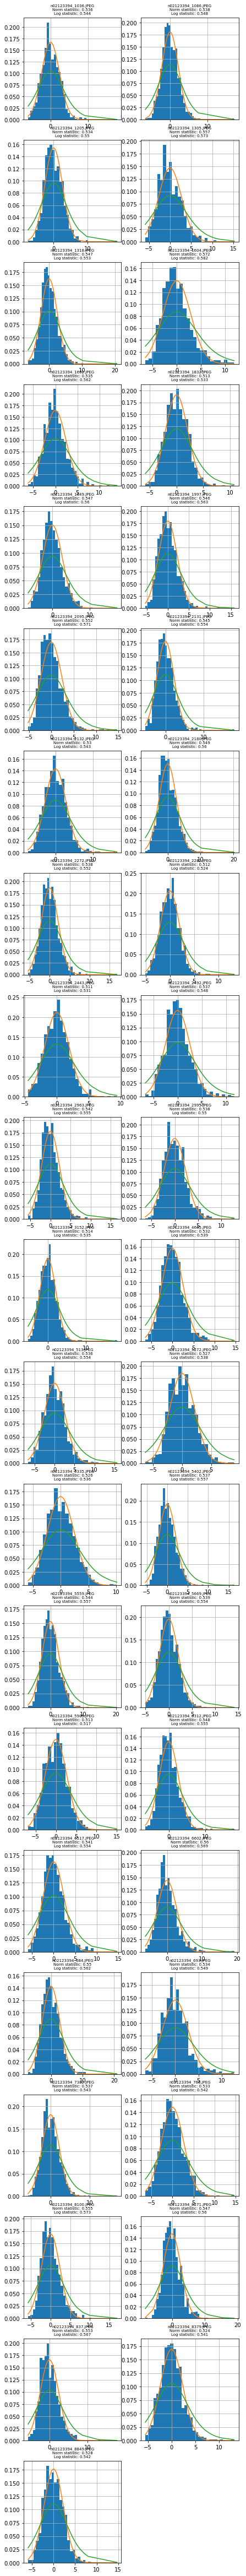

In [5]:
def show_hist(features, row=2, col=2):
    row = math.ceil(len(os.listdir())/col)
    fig = plt.figure(figsize=(7, 85))
    for pcs in range(len(os.listdir())):
        fig.add_subplot(row, col, pcs+1)
        plt.hist(features[pcs], bins='auto', density=True)
        plt.plot(np.sort(np.array(features[pcs])), norm.pdf(np.sort(np.array(features[pcs])),\
                          features[pcs].mean(),\
                          features[pcs].std())) 
        
        plt.plot(np.sort(np.array(features[pcs])), logistic.pdf(np.sort(np.array(features[pcs])),\
                          features[pcs].mean(),\
                          features[pcs].std())) 
        
        plt.title(
                   os.listdir()[pcs] + \
                  '\nNorm statistic: '+ str(stats.kstest(np.sort(np.array(features[pcs])), \
                                                    norm.cdf(np.sort(np.array(features[pcs])),\
                                                      features[pcs].mean(),\
                                                      features[pcs].std())).statistic) +
                  
                '\nLog statistic: '+ str(stats.kstest(np.sort(np.array(features[pcs])), \
                                  logistic.cdf(np.sort(np.array(features[pcs])),\
                                  features[pcs].mean(),\
                                  features[pcs].std())).statistic),
                 fontsize=7 
                 )
    
        plt.grid('on')
        plt.axis('on')
        
show_hist(features_1000)        

In [6]:
features_mean = np.array([features[i].mean() for i in range(len(list_of_pics))])
print('mean for all features', features_mean/features_mean.max())
features_std = np.array([features[i].std() for i in range(len(list_of_pics))])
print('std for all features', features_std/features_std.max())

# tensor_features = torch.stack(features).squeeze(1)
# print(tensor_features.mean(1).shape)
torch.stack(features).squeeze(1).max(1)

mean for all features [0.91625917 0.8496332  0.835138   0.9373036  0.84020257 1.
 0.8223891  0.8378012  0.90569335 0.81138664 0.7007947  0.82492137
 0.988823   0.9296193  0.73332167 0.66241705 0.80946565 0.90560603
 0.7437129  0.86517644 0.7417046  0.9440709  0.92280823 0.8505065
 0.8289382  0.68599373 0.9135522  0.76990926 0.93599373 0.8742578
 0.8422983  0.90665394 0.9095355  0.9023751  0.6918442  0.8983584
 0.79636747 0.8763535  0.7339329  0.90586793 0.7779428 ]
std for all features [0.8329003  0.7707694  0.9032535  0.9490417  0.8577801  1.
 0.8483292  0.73016846 0.9267793  0.7755208  0.81924075 0.78280634
 0.9734699  0.9279807  0.7477973  0.6752553  0.6576682  0.8927714
 0.78240854 0.81589806 0.7349244  0.8853277  0.92066807 0.75339293
 0.8421146  0.72446555 0.9103099  0.71254563 0.9337705  0.9193886
 0.85381496 0.9654494  0.973449   0.9597395  0.7670134  0.93752205
 0.8239536  0.9485852  0.8387065  0.8237382  0.78904796]


torch.return_types.max(
values=tensor([17.7467, 17.1280, 18.5312, 15.1600, 20.5947, 11.8778, 13.9516, 10.7512,
        17.3030, 15.7498, 14.6437, 18.0234, 16.2738, 20.2087, 16.7957, 13.2490,
         9.4049, 11.6968, 16.5801, 12.7944, 18.1138, 14.6623, 15.6261,  8.9564,
        10.1053, 16.3135, 20.3112, 14.0594, 15.0105, 17.9840, 14.6417, 19.1825,
        20.8935, 12.6393, 17.0068, 14.6617, 16.9455, 18.9011, 17.6666, 13.1790,
        14.7202]),
indices=tensor([283, 283, 283, 283, 283, 782, 283, 283, 283, 283, 283, 283, 283, 283,
        283, 283, 283, 700, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
        283, 283, 283, 283, 283, 260, 283, 283, 283, 283, 283, 283, 283]))

C:\Users\Уткин\nnet\interpreter\cars
33


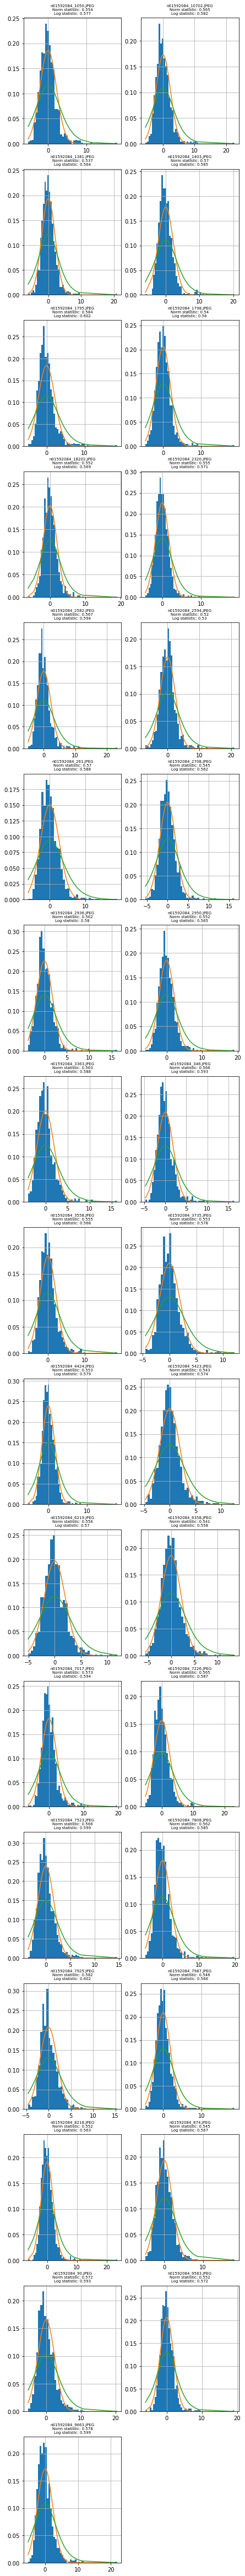

In [7]:
os.chdir("..") #return to root 
if os.path.isdir("cars"):
    os.chdir('cars')
print(os.getcwd())
    
list_of_pics = os.listdir() #list of pic's name
list_image = [Image.open(str(os.listdir()[pcs])) for pcs in range(len(list_of_pics))]                     
preproc_list = [preprocess_image(image) for image in list_image]

print(len(preproc_list))

features_cars = []
def hook(module, input, output): 
    features_cars.append(output.clone().detach())
    
layers_FC = model._modules.get('fc')

act_layer_car_FC = layers_FC.register_forward_hook(hook) ## Get the intermediate result of the entire Lenet model conv2
prediction_list = [model(pred) for pred in preproc_list]
features_cars = [features_cars[i].squeeze(0) for i in range(len(list_of_pics))]
act_layer_car_FC.remove()
show_hist(features_cars)        

In [8]:
features_mean_cars = np.array([features_cars[i].mean() for i in range(len(list_of_pics))])
print('mean for all features', features_mean_cars/features_mean_cars.max())
features_std_cars = np.array([features_cars[i].std() for i in range(len(list_of_pics))])
print('std for all features', features_std_cars/features_std_cars.max())

torch.stack(features_cars).squeeze(1).max(1)

mean for all features [0.74434996 0.93997574 0.84544355 0.7470231  0.7703524  0.81573516
 0.83596605 0.76731473 0.8300122  1.         0.7030377  0.77618474
 0.899028   0.9767922  0.70206565 0.73341435 0.8379101  0.91263676
 0.79222363 0.86014587 0.7613609  0.9273391  0.8211422  0.7834751
 0.6563184  0.8138518  0.8425729  0.8535541  0.816768   0.9169198
 0.8301337  0.8809235  0.731531  ]
std for all features [0.8094857  0.8723859  0.7745726  0.84656197 0.81684184 0.72765726
 0.7414521  0.66415995 0.84639966 0.9020763  1.         0.7340413
 0.66725636 0.8127275  0.74992865 0.7181618  0.8211353  0.7173889
 0.6270858  0.7370336  0.765536   0.8073832  0.8251584  0.95926267
 0.6284782  0.83207524 0.7222509  0.7178128  0.7848032  0.77862114
 0.9084663  0.72618574 0.87375987]


torch.return_types.max(
values=tensor([17.9767, 22.5939, 20.9504, 20.2744, 18.5270, 18.7526, 18.9404, 18.5183,
        23.1953, 21.0222, 18.7482, 16.2456, 16.1854, 19.0183, 16.2345, 16.3873,
        18.5956, 12.0772, 17.6736, 12.5686, 11.8220, 13.6189, 19.6533, 23.1120,
        14.5601, 19.8228, 15.3598, 18.4354, 23.4637, 18.0924, 20.3995, 19.2104,
        21.8448]),
indices=tensor([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 16,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]))

In [9]:
#Saliency map
list_of_pics = os.listdir() 
list_image = [Image.open(str(os.listdir()[pcs])) for pcs in range(len(list_of_pics))]                     
preproc_list = [preprocess_image(image) for image in list_image]
print(len(preproc_list))

features_layer_4 = []
def hook(module, input, output): 
    features_layer_4.append(output.clone().detach())
    
layers_4 = model._modules.get('layer4')

act_layer_4 = layers_4.register_forward_hook(hook) ## Get the intermediate result of the entire Lenet model conv2
prediction_list = [model(pred) for pred in preproc_list]
f_sal_map = [features_layer_4[i].squeeze(0) for i in range(len(list_of_pics))]
act_layer_4.remove()



33


In [16]:
print(type(tuple(f_sal_map)))
f_sal_map = torch.stack(tuple(f_sal_map))
print(f_sal_map.shape)
f_33_2048_49 = f_sal_map.reshape(f_sal_map.size(0), f_sal_map.size(1), 
                     f_sal_map.size(2)*f_sal_map.size(3))
print(f_33_2048_49.shape)
f_33_49 = f_33_2048_49.mean(axis=1)
print(f_33_49.shape)

<class 'tuple'>
torch.Size([33, 2048, 7, 7])
torch.Size([33, 2048, 49])
torch.Size([33, 49])


In [ ]:
show_hist(f_33_49)        

In [ ]:
#Saliency map layer 3
list_of_pics = os.listdir() 
list_image = [Image.open(str(os.listdir()[pcs])) for pcs in range(len(list_of_pics))]                     
preproc_list = [preprocess_image(image) for image in list_image]
print(len(preproc_list))

features_layer_3 = []
def hook(module, input, output): 
    features_layer_3.append(output.clone().detach())
    
layers_3 = model._modules.get('layer3')

act_layer_3 = layers_3.register_forward_hook(hook) ## Get the intermediate result of the entire Lenet model conv2
prediction_list = [model(pred) for pred in preproc_list]
f_sal_layer_3 = [features_layer_3[i].squeeze(0) for i in range(len(list_of_pics))]
act_layer_3.remove()
f_sal_layer_3 = torch.stack(f_sal_layer_3) # 33 2048 7 7

In [ ]:
print(f_sal_layer_3.shape)
f_33_1024_196 = f_sal_layer_3.reshape(f_sal_layer_3.size(0), f_sal_layer_3.size(1), 
                     f_sal_layer_3.size(2)*f_sal_layer_3.size(3))
print(f_33_1024_196.shape)
f_33_196 = f_33_1024_196.mean(axis=1)
print(f_33_196.shape)

In [ ]:
show_hist(f_33_196)        

In [ ]:
#Saliency map layer 2
list_of_pics = os.listdir() 
list_image = [Image.open(str(os.listdir()[pcs])) for pcs in range(len(list_of_pics))]                     
preproc_list = [preprocess_image(image) for image in list_image]
print(len(preproc_list))

features_layer_2 = []
def hook(module, input, output): 
    features_layer_2.append(output.clone().detach())
    
layers_2 = model._modules.get('layer2')

act_layer_2 = layers_2.register_forward_hook(hook) ## Get the intermediate result of the entire Lenet model conv2
prediction_list = [model(pred) for pred in preproc_list]
f_sal_layer_2 = [features_layer_2[i].squeeze(0) for i in range(len(list_of_pics))]
act_layer_2.remove()
f_sal_layer_2 = torch.stack(f_sal_layer_2) # 33 2048 7 7

In [ ]:
print(f_sal_layer_2.shape)
f_33_512 = f_sal_layer_2.reshape(f_sal_layer_2.size(0), f_sal_layer_2.size(1), 
                     f_sal_layer_2.size(2)*f_sal_layer_2.size(3))
print(f_33_512.shape)
f_33_512 = f_33_512.mean(axis=1)

In [ ]:
show_hist(f_33_512)        

In [ ]:
f_33_512.shape

In [ ]:
# x = np.sort(np.array(f_33_512[2]))
# pn=norm.pdf(x, np.mean(x), np.std(x))#нормальное интегральное  распределение 
# plt.plot(x, pn, label='norm pdf')
# plt.grid("on")
# pn=norm.cdf(x, np.mean(x), np.std(x))#нормальное интегральное  распределение 
# stats.kstest(x, pn).statistic